<a href="https://colab.research.google.com/github/GauraoM/Tensorflow/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Q-Learning
For this example we will use the Q-Learning algorithm to train an agent to navigate a popular enviornment from the Open AI Gym. The Open AI Gym was developed so programmers could practice machine learning using unique enviornments. Intersting fact, Elon Musk is one of the founders of OpenAI!

In [1]:
import gym


In [2]:
env = gym.make("FrozenLake-v0") # Going to use Frozenlake environment

In [3]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [4]:
env.reset()  # reset enviornment to default state

0

In [5]:
action = env.action_space.sample()  # get a random action 

In [6]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [7]:
env.render()   # render the GUI for the enviornment 

  (Down)
SFFF
FHFH
FFFH
HFFG


### Frozen Lake Enviornment
There are:

16 states (one for each square)

4 possible actions (LEFT, RIGHT, DOWN, UP)

4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

In [9]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [10]:
# Create an empty Q table
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Some Constant  

In [11]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

In [12]:
## Picking an action

epsilon = 0.9 # start with a 90% chance of picking a random action

if np.random.uniform(0,1) < 0.9:
  action = env.action_space.sample # Take a random action
else:
  action = np.argmax(Q[state, :])  # Look the Q table and choose the best action on current values

#### Updating Q Value

In [ ]:
# Formula
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

#### Putting Together

In [18]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [20]:
rewards = []
# Iterating over episodes
for episode in range(EPISODES):
  # Reset environment to initial state
  state = env.reset()

  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon: 
      action = env.action_space.sample()  # Take a random action
    else:
      action = np.argmax(Q[state, :]) #Look the Q table and choose the best action on current values

    next_state, reward, done, _ = env.step(action) ## Take the action at each step

    # Update the Q values based on the formula below
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

[[3.40389685e-01 1.96293595e-02 1.94926809e-02 2.04170375e-02]
 [3.21921071e-03 7.23991001e-03 6.73418668e-03 2.90784707e-01]
 [8.21312990e-03 4.43938873e-03 5.41639893e-03 3.12591614e-01]
 [4.99682448e-03 4.06169679e-03 7.54564110e-04 1.22685507e-01]
 [3.68488856e-01 1.25981458e-02 1.26125559e-02 6.38086897e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.84396546e-06 1.72734706e-06 2.19340806e-01 4.01609348e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.30543623e-02 1.34173052e-02 1.00488913e-02 4.69344393e-01]
 [1.10256254e-02 7.19297735e-01 9.76602676e-03 9.83805913e-03]
 [5.59532933e-01 3.50737100e-03 2.01416081e-03 2.74741827e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.31579988e-02 2.96341979e-02 5.44210730e-01 1.80159874e-02]
 [9.71655062e-02 9.16969829e-01 1.35369416e-01 2.00429790e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

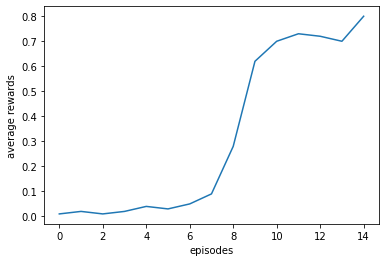

In [21]:
# we can plot the training progress and see how the agent improved

import matplotlib.pyplot as plt
 
def get_average(values):
  return(sum(values)/len(values))

avg_rewards = []
for i in range(0 ,len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)  
plt.ylabel("average rewards")
plt.xlabel("episodes")
plt.show() 